In [1]:
%matplotlib inline  
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import igraph as ig

In [2]:
dataN = pd.read_csv("data/FINAL_ALL_SEQUENCES_TRAINTEST.tsv", sep = '\t')

In [33]:
a = []
for i in range(123707):
    a.append(len(list(dataN.loc[i])[1]))
y = a.index(max(a))

In [69]:
string = list(dataN.loc[4])[1]
clientId = str(list(dataN.loc[4])[0])
string = eval(string)

In [70]:
nodes = []
nodes = np.unique(string)
N = len(nodes)

In [71]:
links = []
for i in range(len(string)-1):
    t = {}
    t["source"] = list(nodes).index(list(string)[i])
    t["target"] = list(nodes).index(list(string)[i+1])
    links.append(t)

In [72]:
L=len(links)
print(L, N)
Edges = [(links[k]['source'], links[k]['target']) for k in range(L)]

43 28


In [73]:
G=ig.Graph(Edges, directed=False)
print(G)

IGRAPH U--- 28 43 --
+ edges:
19--27 11--27 5--11 3--5 3--11 11--23 11--23 11--21 21--24 3--24 3--14 14--25
1--25 1--6 6--9 9--13 13--24 13--24 1--13 1--25 11--25 0--11 0--4 2--4 2--16
0--16 0--15 15--18 7--18 7--12 12--18 7--18 0--7 0--10 9--10 8--9 0--8 0--26
17--26 17--22 0--22 0--3 3--20


In [74]:
layt = G.layout('kk', dim=3)

In [75]:
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in Edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

In [76]:

trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size=6,
                             color="red",
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=nodes,
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Client_ID sequences: " + clientId,
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            xref='paper',
            yref='paper',
            text = "Datasourse: FINAL_ALL_SEQUENCES_TRAINTEST.tsv",
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

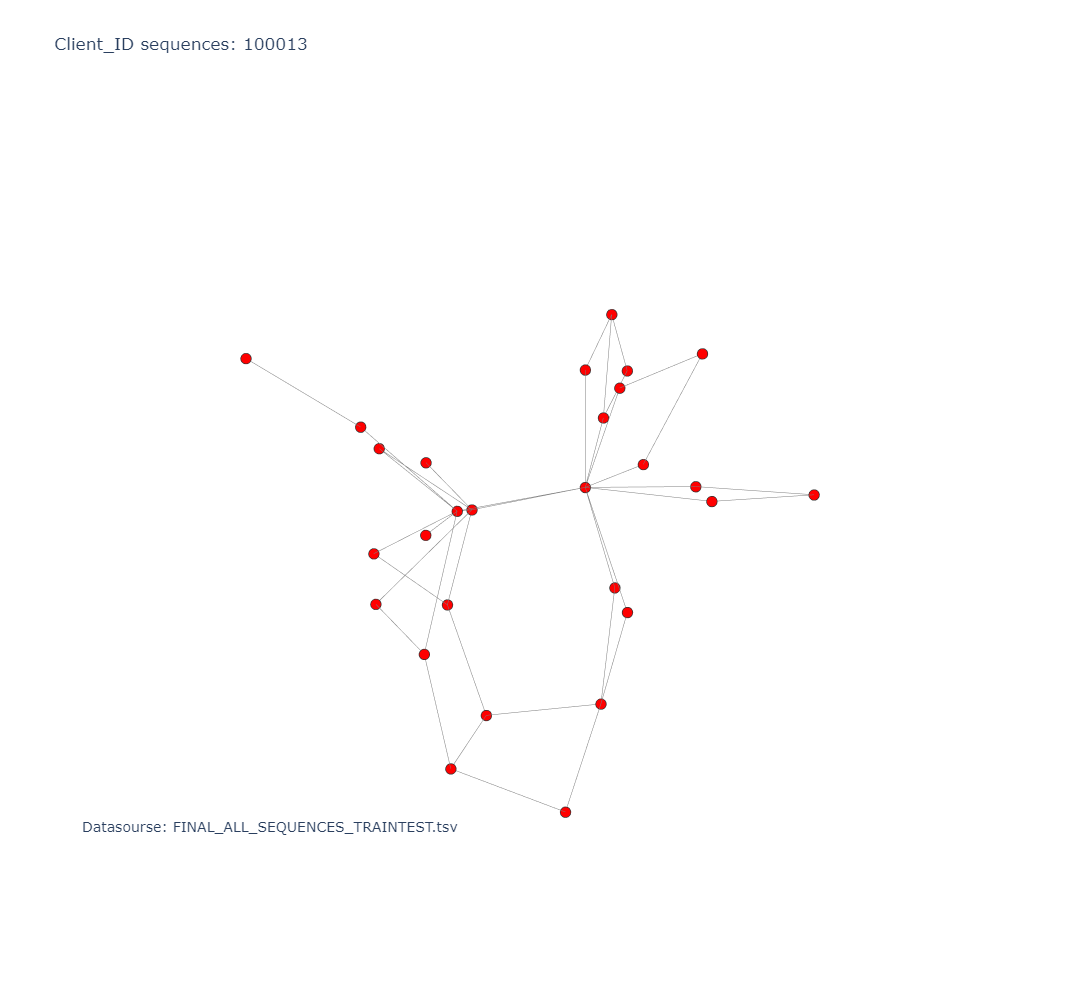

In [77]:
data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)

py.iplot(fig)